In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"Cleaned_IMF_FSI_for_analysis.csv")
df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Period,Value
0,Brazil,223,"Financial Soundness Indicators, Core Set, Depo...",FSANL_PT,2005,3.525532
1,Brazil,223,"Financial Soundness Indicators, Core Set, Depo...",FSANL_PT,2005Q1,3.157025
2,Brazil,223,"Financial Soundness Indicators, Core Set, Depo...",FSANL_PT,2005Q2,2.994277
3,Brazil,223,"Financial Soundness Indicators, Core Set, Depo...",FSANL_PT,2005Q3,3.274282
4,Brazil,223,"Financial Soundness Indicators, Core Set, Depo...",FSANL_PT,2005Q4,3.525532
5,Brazil,223,"Financial Soundness Indicators, Core Set, Depo...",FSANL_PT,2006,3.460664
6,Brazil,223,"Financial Soundness Indicators, Core Set, Depo...",FSANL_PT,2006Q1,3.687905
7,Brazil,223,"Financial Soundness Indicators, Core Set, Depo...",FSANL_PT,2006Q2,3.575429
8,Brazil,223,"Financial Soundness Indicators, Core Set, Depo...",FSANL_PT,2006Q3,3.632104
9,Brazil,223,"Financial Soundness Indicators, Core Set, Depo...",FSANL_PT,2006Q4,3.460664


In [4]:
df['Country Name'].unique()

array(['Brazil', 'France', 'Germany', 'Japan'], dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1105 non-null   object 
 1   Country Code    1105 non-null   int64  
 2   Indicator Name  1105 non-null   object 
 3   Indicator Code  1105 non-null   object 
 4   Period          1105 non-null   object 
 5   Value           1105 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 51.9+ KB


In [4]:
# Converting period to datetime
def convert_period_to_date( period):
    if 'Q' in period:
        year, quarter = period.split('Q')
        quarter = int(quarter)
        month = (quarter -1)*3+1
        return pd.Timestamp(f'{year}-{month:02d}-01')
    else:
        return pd.Timestamp(f'{period}-01-01')

df['Date'] =df['Period'].apply(convert_period_to_date)

In [5]:
df.info

<bound method DataFrame.info of      Country Name  Country Code  \
0          Brazil           223   
1          Brazil           223   
2          Brazil           223   
3          Brazil           223   
4          Brazil           223   
...           ...           ...   
1100        Japan           158   
1101        Japan           158   
1102        Japan           158   
1103        Japan           158   
1104        Japan           158   

                                         Indicator Name Indicator Code  \
0     Financial Soundness Indicators, Core Set, Depo...       FSANL_PT   
1     Financial Soundness Indicators, Core Set, Depo...       FSANL_PT   
2     Financial Soundness Indicators, Core Set, Depo...       FSANL_PT   
3     Financial Soundness Indicators, Core Set, Depo...       FSANL_PT   
4     Financial Soundness Indicators, Core Set, Depo...       FSANL_PT   
...                                                 ...            ...   
1100  Financial Soundness Ind

In [6]:
# Sorting value by date for time series analyis
df= df.sort_values(by=['Date'])

Plotting for: Brazil - FSANL_PT


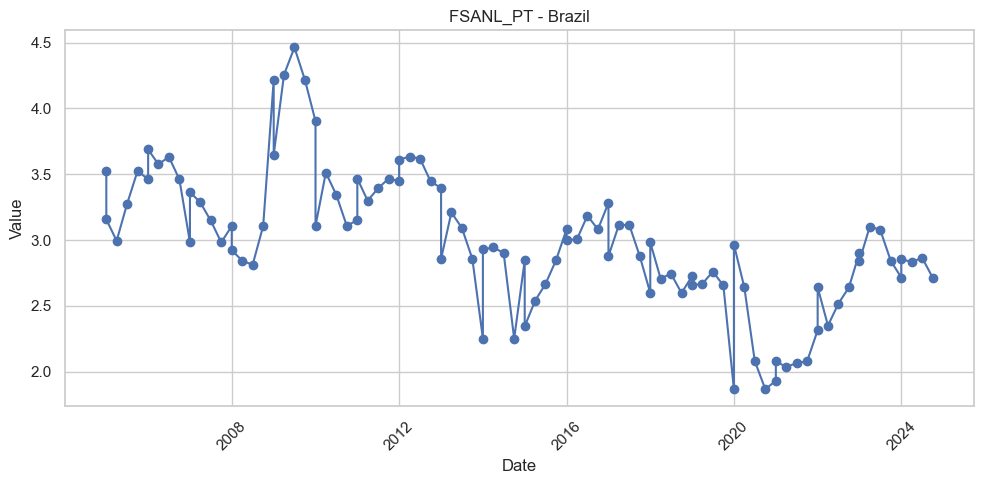

Plotting for: Brazil - FSERA_PT


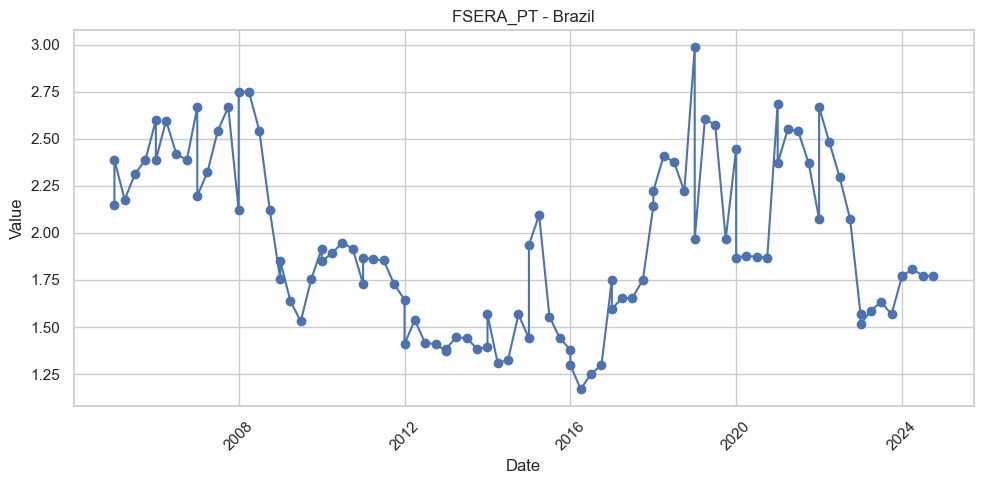

Plotting for: Brazil - FSKRTC_PT


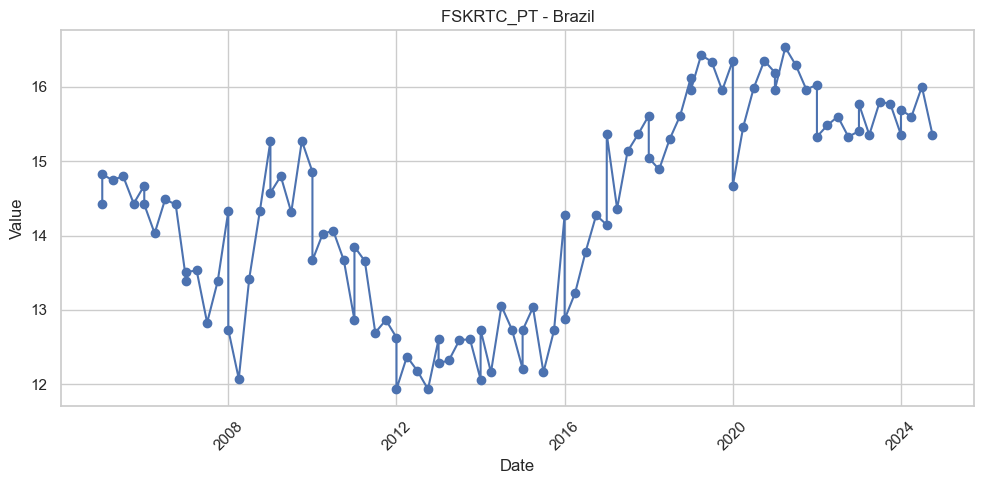

Plotting for: Brazil - FSLS_PT


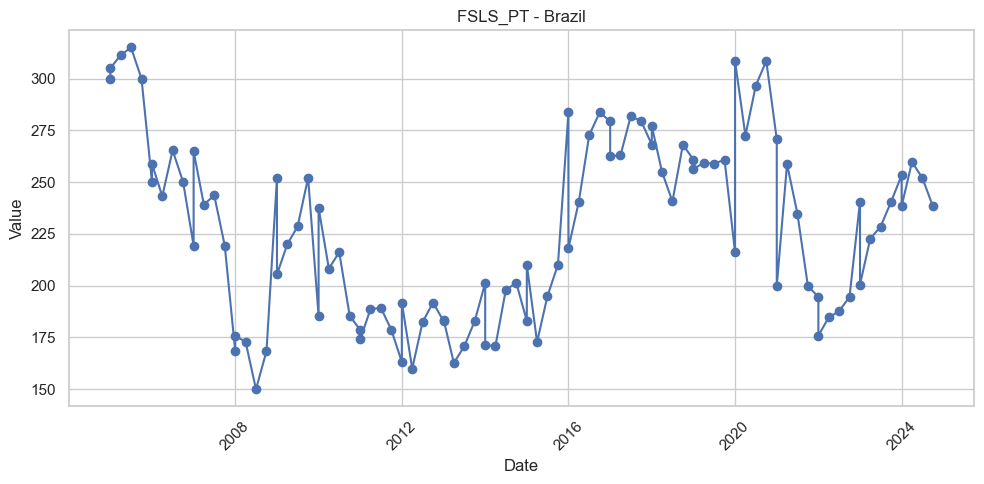

Plotting for: Brazil - FSKNL_PT


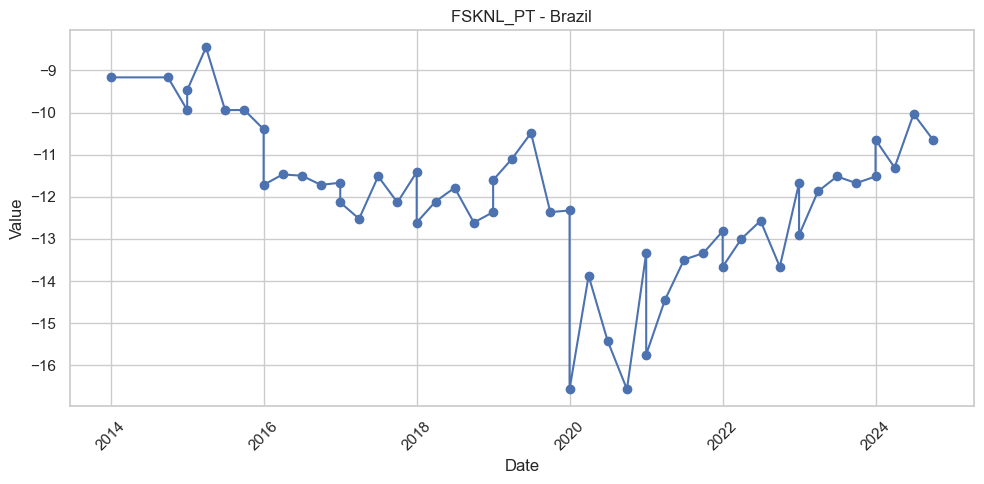

Plotting for: Brazil - FSSNO_PT


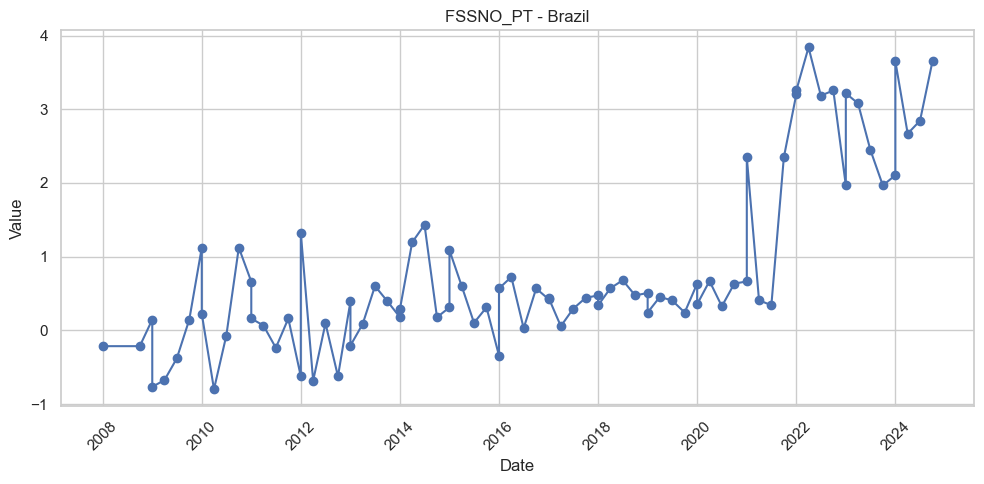

Plotting for: Germany - FSANL_PT


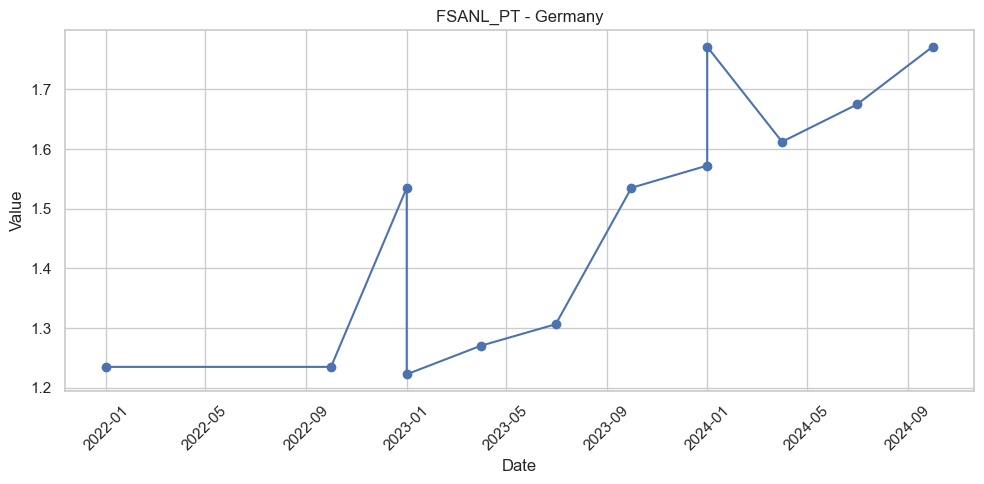

Plotting for: Germany - FSERA_PT


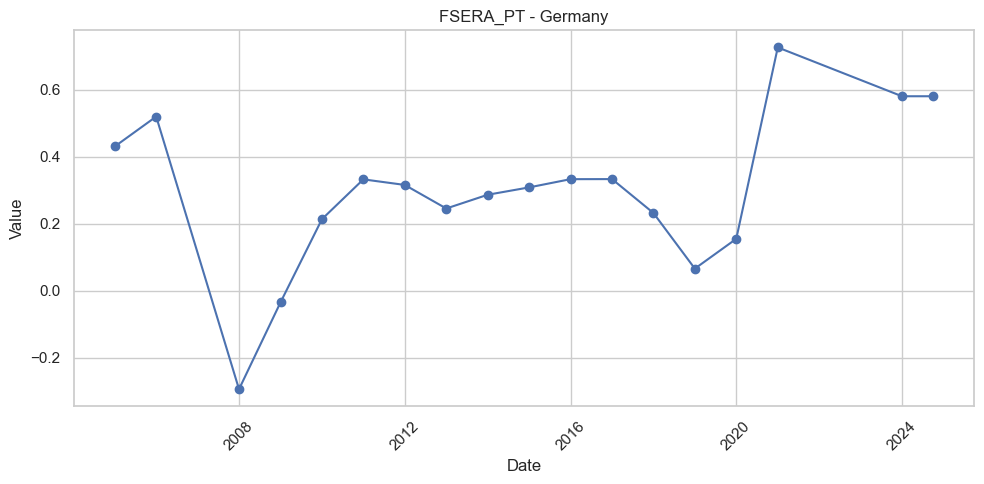

Plotting for: Germany - FSKRTC_PT


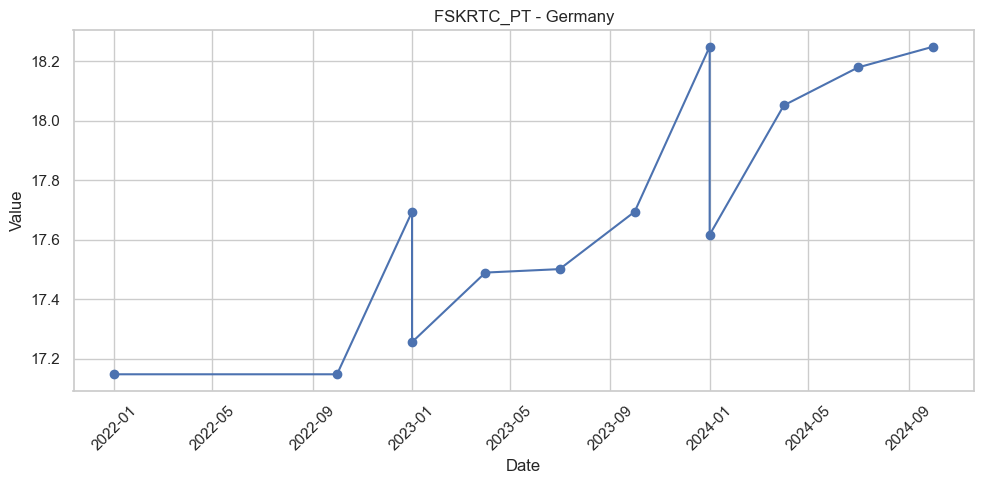

Plotting for: Germany - FSLS_PT


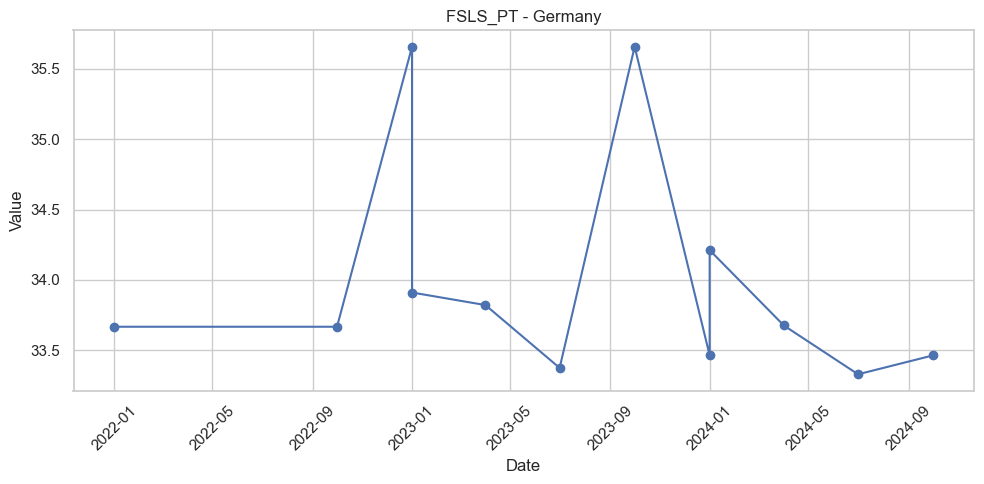

Plotting for: Germany - FSKNL_PT


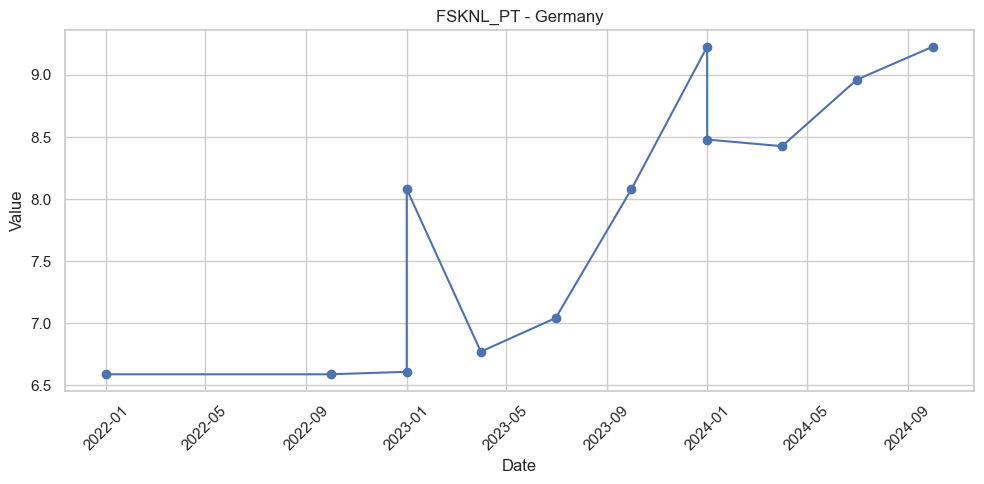

Plotting for: Germany - FSSNO_PT


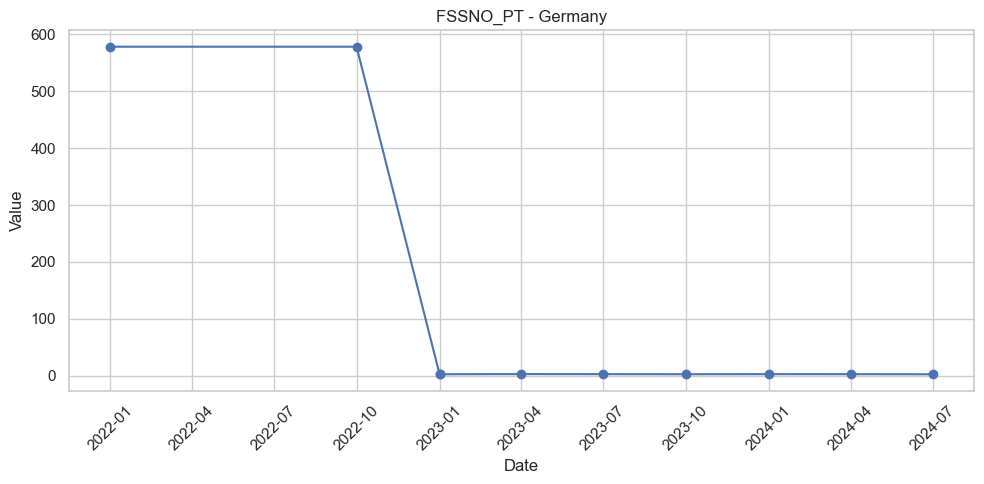

Plotting for: France - FSANL_PT


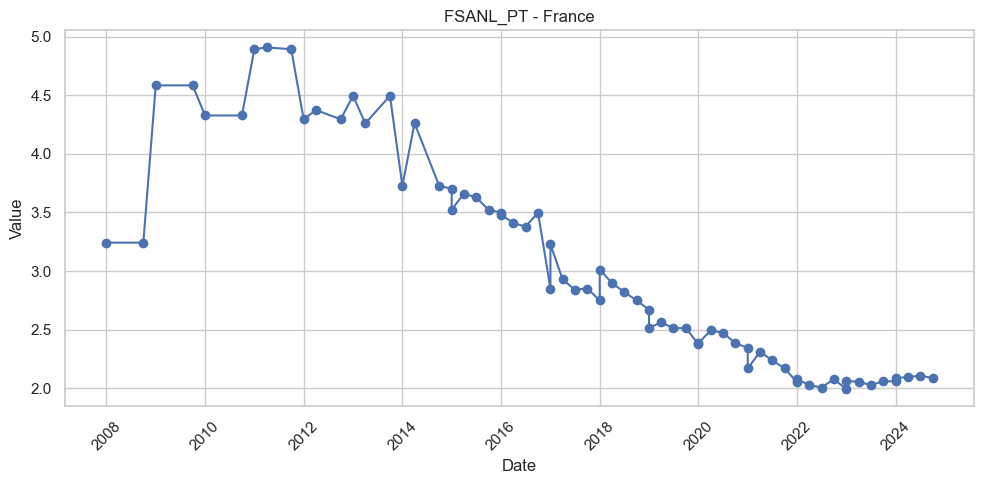

Plotting for: France - FSERA_PT


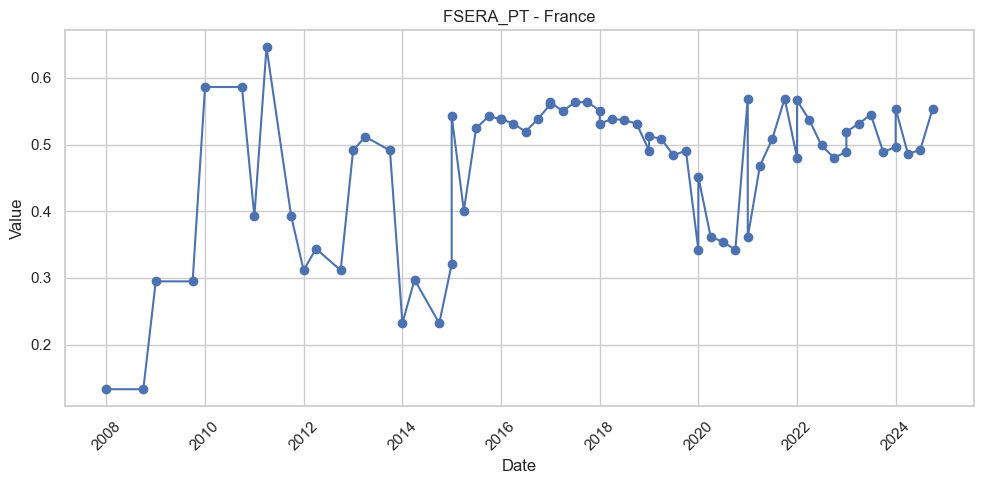

Plotting for: France - FSKRTC_PT


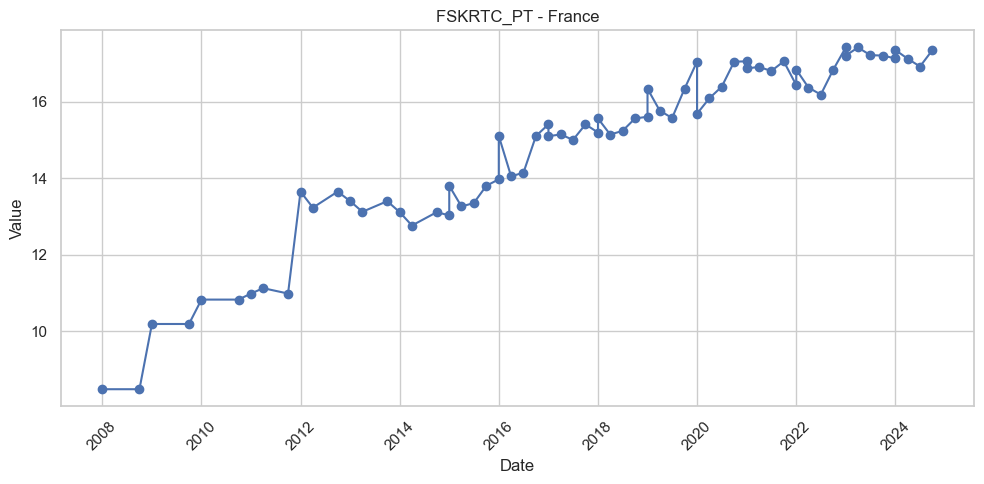

Plotting for: France - FSLS_PT


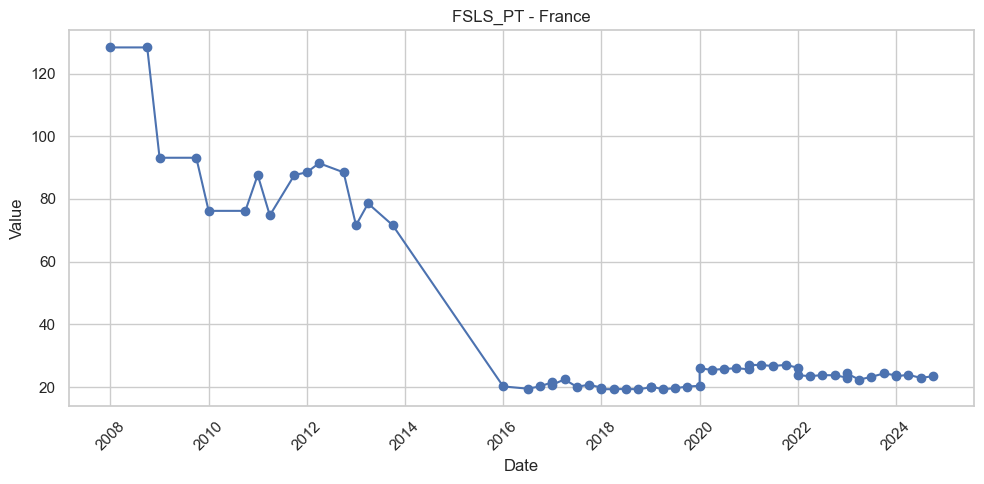

Plotting for: France - FSKNL_PT


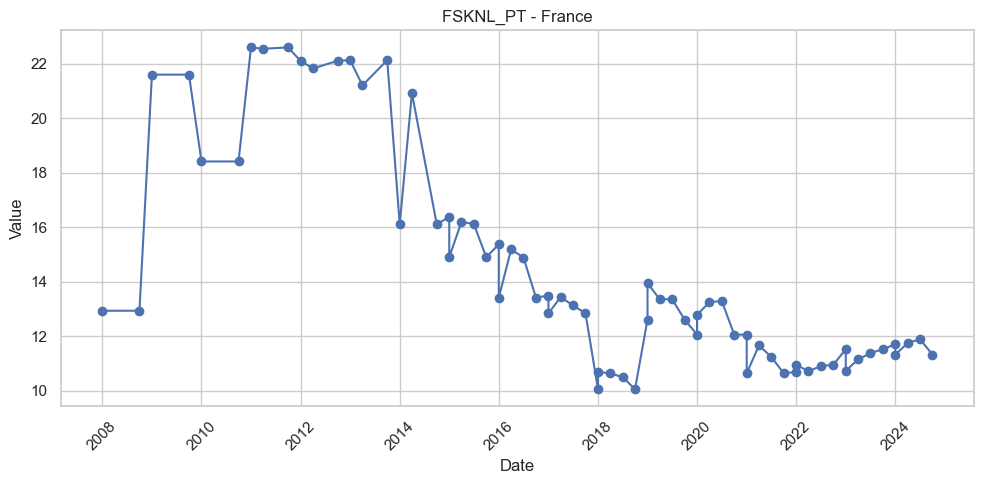

Plotting for: France - FSSNO_PT


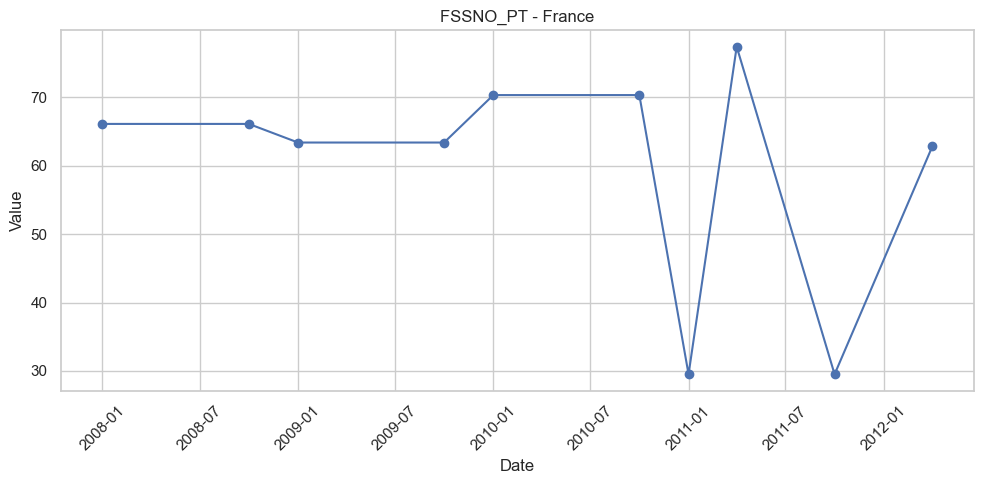

Plotting for: Japan - FSANL_PT


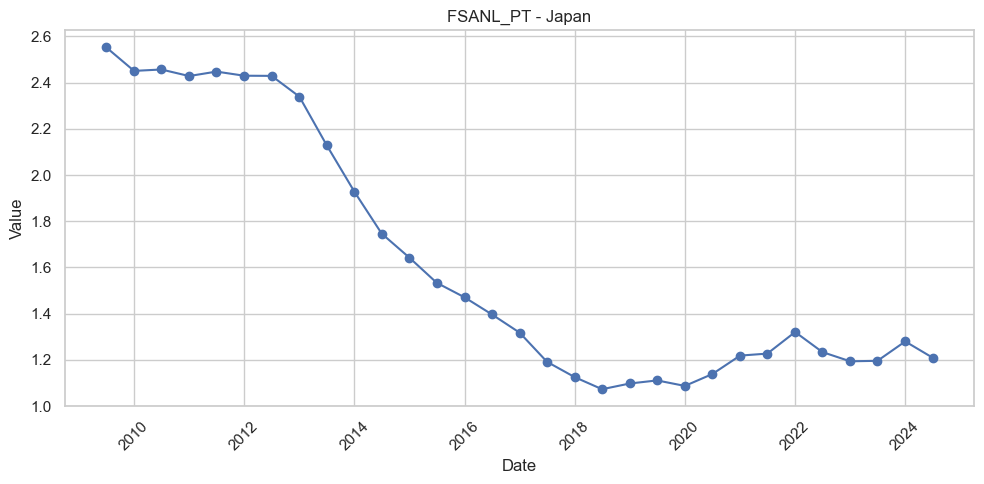

Plotting for: Japan - FSERA_PT


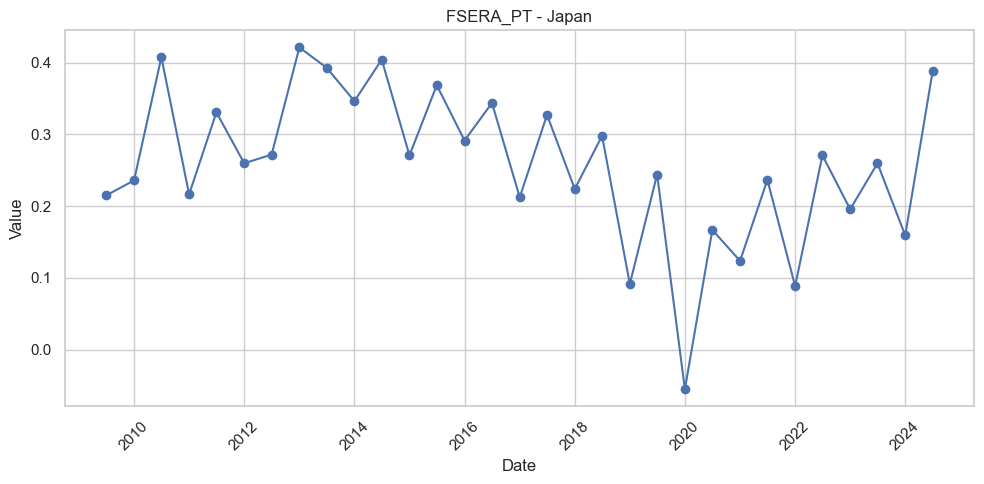

Plotting for: Japan - FSKRTC_PT


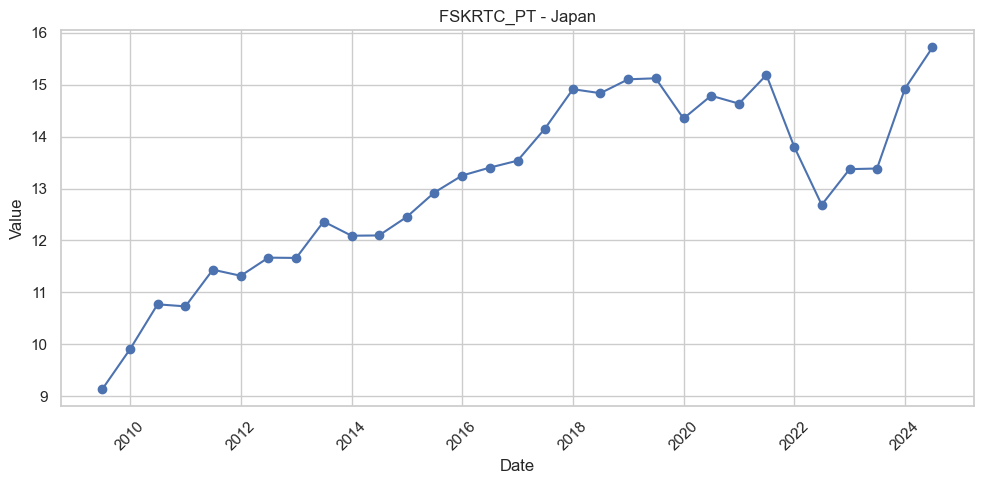

Plotting for: Japan - FSLS_PT


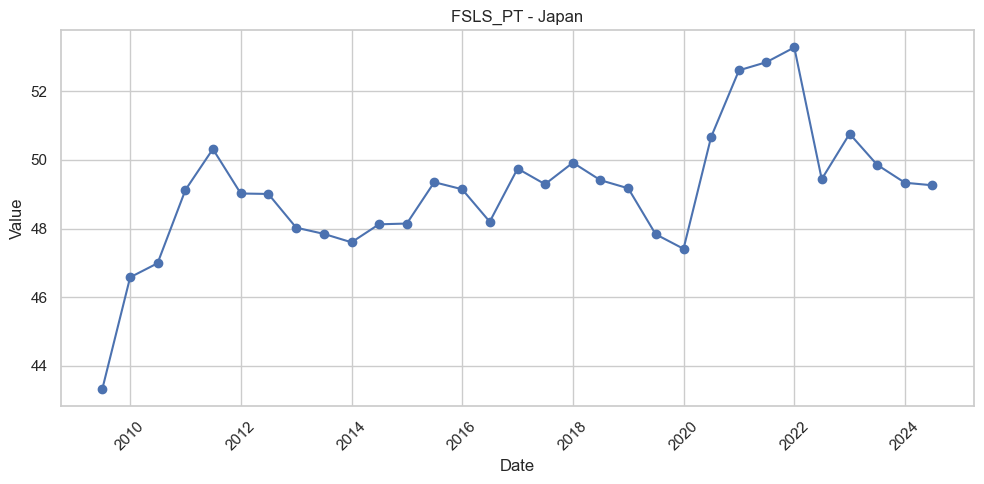

Plotting for: Japan - FSKNL_PT


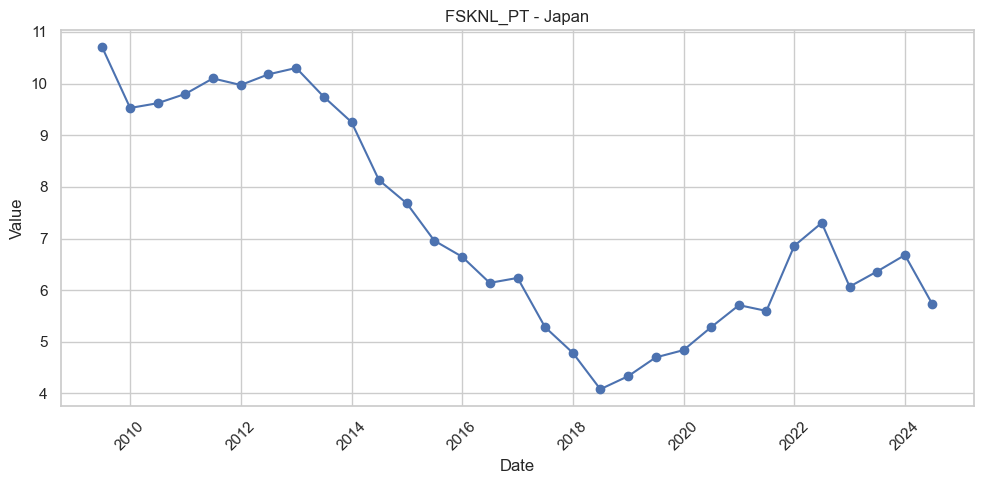

Skipping Japan - FSSNO_PT (no data)


In [10]:
# Set seaborn style
sns.set(style="whitegrid")

# Assigning unique country names and indicators for loop 
Countries = df['Country Name'].unique()
Indicators = df['Indicator Code'].unique()

# Creating plot for each country-indicator combo
for country in Countries:
    for indicator in Indicators:
        subset =df[(df['Country Name'] == country) & (df['Indicator Code'] == indicator)]

        if subset.empty:
            continue
        print(f"Plotting for: {country} - {indicator}")
        
        plt.figure(figsize=(10, 5))
        plt.plot(subset['Date'], subset['Value'], marker='o', linestyle='-')
        plt.title(f"{indicator} - {country}")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(True)
        plt.show()